In [446]:
from mmdew.bucket_stream2 import BucketStream
from mmdew.bucket_stream_old import BucketStream as OldBucketStream
import numpy as np
import pandas as pd
from mmdew.mmd import MMD
import numpy.linalg as la
np.random.seed(41)
linear_mmd = MMD(biased=True, gamma=1, kernel="linear")
rbf_mmd = MMD(biased=True, gamma=1, kernel="rbf")
import math
import matplotlib.pyplot as plt

In [447]:
sample_size = 64
X = np.random.normal(0, 1, sample_size).reshape(-1,1)
Y = np.random.normal(1, 2, sample_size).reshape(-1,1)

Ok, lets first just compare normal MMD to Nystroem MMD

In [448]:
ss_size = math.ceil(math.sqrt(sample_size))
print(linear_mmd.nystroem_mmd(X,Y,m=ss_size))
print(linear_mmd.mmd(X,Y))

1.1986214433875406
1.1986214433875402


It's equal. Now do rbf mmd

In [449]:
print(ss_size)
print(rbf_mmd.nystroem_mmd(X,Y,m=ss_size))
print(rbf_mmd.mmd(X,Y))

8
0.14357201049738766
0.1245028489285891


Ok, that's pretty terrible. Let's look at how the variance of the normal nyström estimator relates to the sample size.

In [453]:
deviations = pd.DataFrame(columns=['n', 'm','reg_deviation','nys_deviation'])
for i in range(1,101):
    
    sample_size=i*20
    ss_size = math.ceil(math.sqrt(sample_size))
    iter_values_reg = []
    iter_values_nys = []
   
    for j in range(0,30):
        X = np.random.normal(0, 1, sample_size).reshape(-1,1)
        Y = np.random.normal(1, 2, sample_size).reshape(-1,1)
        iter_values_reg.append(rbf_mmd.mmd(X,Y))
        iter_values_nys.append(rbf_mmd.nystroem_mmd(X,Y,ss_size))
    deviations.loc[i-1] = [sample_size, ss_size, np.std(iter_values_reg),np.std(iter_values_nys)]

deviations


,n,m,reg_deviation,nys_deviation
0,20.0,5.0,0.092710,0.139856
1,40.0,7.0,0.066400,0.124856
2,60.0,8.0,0.061660,0.080906
3,80.0,9.0,0.039267,0.048490
4,100.0,10.0,0.038670,0.048753
...,...,...,...,...
95,1920.0,44.0,0.007640,0.007617
96,1940.0,45.0,0.009482,0.009574
97,1960.0,45.0,0.009129,0.009061
98,1980.0,45.0,0.008258,0.008305


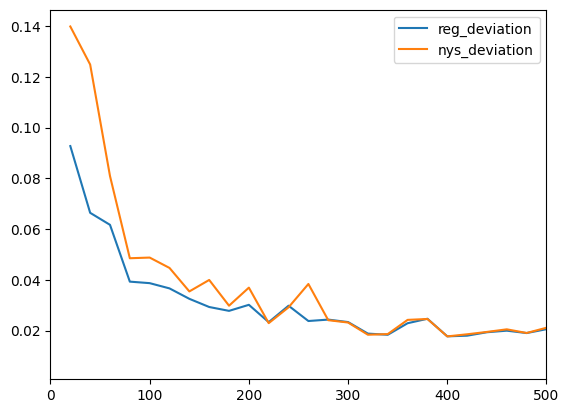

In [455]:
plt.plot(deviations['n'], deviations['reg_deviation'], label='reg_deviation')
plt.plot(deviations['n'], deviations['nys_deviation'], label='nys_deviation')
plt.xlim(0, 500)
plt.legend()
plt.show()

Seems to be pretty similar to the one of the empirical estimator. But lets take the same samples everytime

In [458]:
deviations = pd.DataFrame(columns=['n', 'm','reg_deviation','nys_deviation'])
for i in range(1,101):
    
    sample_size=i*20
    ss_size = math.ceil(math.sqrt(sample_size))
    iter_values_reg = []
    iter_values_nys = []
    X = np.random.normal(0, 1, sample_size).reshape(-1,1)
    Y = np.random.normal(1, 2, sample_size).reshape(-1,1)
    for j in range(0,10):
       
        iter_values_reg.append(rbf_mmd.mmd(X,Y))
        iter_values_nys.append(rbf_mmd.nystroem_mmd(X,Y,ss_size))
    deviations.loc[i-1] = [sample_size, ss_size, np.std(iter_values_reg),np.std(iter_values_nys)]



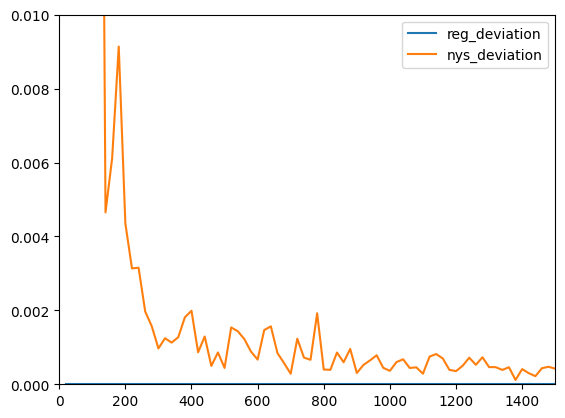

In [465]:
plt.plot(deviations['n'], deviations['reg_deviation'], label='reg_deviation')
plt.plot(deviations['n'], deviations['nys_deviation'], label='nys_deviation')
plt.xlim(0, 1500)
plt.ylim(0,0.01)
plt.legend()
plt.show()

Seems like we have to take at least 512 in order to reduce the variance to a feasible amount (\<0.001).